In this notebook we pick up the transformed datasets and the selected features from notebooks 2 and 3.

# Reproducibility: Setting the seed

With the aim to ensure reproducibility between runs of the same notebook, but also between the research and production environment, for each step that includes some element of randomness, it is extremely important that we **set the seed**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import joblib

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

pd.set_option('display.max_columns', None)

## Load datasets

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')


In [3]:
y_train.head()

,SalePrice
0,12.211060
1,11.887931
2,12.675764
3,12.278393
4,12.103486


In [4]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.750000,0.75,0.461171,0.366365,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.0,0.75,0.018692,1.0,0.75,0.430183,0.5,0.5,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.456066,0.388528,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,0.5,0.5,0.333333,0.666667,0.000000,0.8,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.0,0.75,0.457944,0.5,0.25,0.220028,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.666667,0.75,0.0,0.0,0.0
2,0.916667,0.75,0.394699,0.336782,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,0.5,1.0,1.000000,0.666667,0.000000,1.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.75,0.046729,0.5,0.50,0.406206,0.5,0.5,1.0,0.228705,0.149909,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0
3,0.750000,0.75,0.445002,0.482280,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,1.000000,1.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.75,0.084112,0.5,0.50,0.362482,0.5,0.5,1.0,0.469078,0.045704,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.636364,0.666667,0.75,1.0,0.0,0.0
4,0.750000,0.75,0.577658,0.391756,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,0.5,0.5,0.333333,0.666667,0.000000,0.6,0.086818,0.0,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.75,0.411215,0.5,0.50,0.406206,0.5,0.5,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0


In [6]:
# load the pre-selected features
# ==============================

# we selected the features in the previous notebook (step 3)

features = pd.read_csv('selected_features.csv')
features = features['0'].to_list()

# display final feature set
features

['MSSubClass',
 'MSZoning',
 'LotArea',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'SaleCondition']

In [7]:
# reduce the train and test set to the selected features

X_train = X_train[features]
X_test = X_test[features]

In [8]:
X_train.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,PavedDrive,WoodDeckSF,ScreenPorch,SaleCondition
0,0.750000,0.75,0.366365,0.333333,1.000000,0.0,0.863636,0.777778,0.50,0.049180,0.0,1.0,0.666667,1.0,0.666667,0.666667,1.0,1.00,1.0,0.559760,0.0,0.523250,0.000000,0.666667,0.0,0.666667,0.416667,1.0,0.000000,0.0,1.0,0.75,1.0,0.116686,0.0,0.75
1,0.750000,0.75,0.388528,0.333333,0.333333,0.0,0.363636,0.444444,0.75,0.049180,0.0,0.6,0.666667,0.5,0.333333,0.000000,0.8,1.00,1.0,0.434539,0.0,0.406196,0.333333,0.333333,0.5,0.666667,0.250000,1.0,0.000000,0.0,0.5,0.25,1.0,0.000000,0.0,0.75
2,0.916667,0.75,0.336782,0.000000,0.333333,0.0,0.954545,0.888889,0.50,0.098361,1.0,0.3,1.000000,1.0,1.000000,0.000000,1.0,1.00,1.0,0.627205,0.0,0.586296,0.333333,0.666667,0.0,1.000000,0.333333,1.0,0.333333,0.8,0.5,0.50,1.0,0.228705,0.0,0.75
3,0.750000,0.75,0.482280,0.666667,0.666667,0.0,0.454545,0.666667,0.50,0.163934,0.0,1.0,0.666667,1.0,0.666667,1.000000,1.0,1.00,1.0,0.566920,0.0,0.529943,0.333333,0.666667,0.0,0.666667,0.250000,1.0,0.333333,0.4,0.5,0.50,1.0,0.469078,0.0,0.75
4,0.750000,0.75,0.391756,0.333333,0.333333,0.0,0.363636,0.555556,0.50,0.737705,0.0,0.6,0.333333,0.5,0.333333,0.000000,0.6,0.75,1.0,0.549026,0.0,0.513216,0.000000,0.666667,0.0,0.333333,0.416667,1.0,0.333333,0.8,0.5,0.50,1.0,0.000000,0.0,0.75


In [10]:
len(X_train.columns)

36

## Train the model  (Lasso Regression)
Remember to set the seed before training the model.

In [11]:
lin_model = Lasso(alpha=0.001, random_state=0)
lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [12]:
# evaluate the model:
# ====================

# remember that we log transformed the output (SalePrice)
# in our feature engineering notebook (step 2).

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original house prices values.

# We will evaluate performance using the mean squared error and
# the root of the mean squared error and r2

# make predictions for train set
preds = lin_model.predict(X_train)

# determine mse, rmse and r2
mse = mean_squared_error(np.exp(y_train), np.exp(preds))
rmse = np.sqrt(mse)
r2 = r2_score(np.exp(y_train), np.exp(preds))

print('train mse: {}'.format(mse))
print('train rmse: {}'.format(rmse))
print('train r2: {}'.format(r2))


train mse: 772198334.3067443
train rmse: 27788.456853642383
train r2: 0.8763262128816207


In [13]:
# make predictions for test set
preds = lin_model.predict(X_test)

# determine mse, rmse and r2
mse = mean_squared_error(np.exp(y_test), np.exp(preds))
rmse = np.sqrt(mse)
r2 = r2_score(np.exp(y_test), np.exp(preds))

print('test mse: {}'.format(mse))
print('test rmse: {}'.format(rmse))
print('test r2: {}'.format(r2))


test mse: 1077066272.4197638
test rmse: 32818.68785341309
test r2: 0.8432700518700358


In [14]:
print('Average house price: ', int(np.exp(y_train).median()))

Average house price:  163000


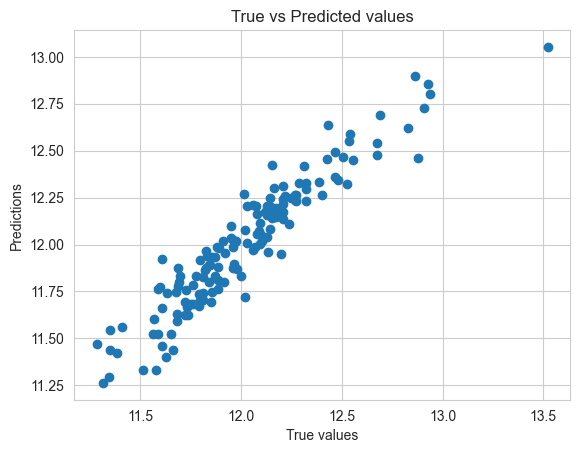

In [18]:
# let's plot the predictions to the real values
# =============================================
plt.scatter(y_test, preds)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.title('True vs Predicted values')
plt.show();

let's evaluate the residuals


In [19]:
# evaluate the residuals
# ======================
# let's evaluate the distribution of the errors:
# they should be fairly normally distributed

y_test.reset_index(drop=True, inplace=True)

preds = pd.Series(lin_model.predict(X_test))

preds

0      12.175793
1      11.917238
2      11.662980
3      12.303104
4      11.423063
         ...    
141    11.763792
142    12.329463
143    11.954652
144    11.772995
145    12.077226
Length: 146, dtype: float64

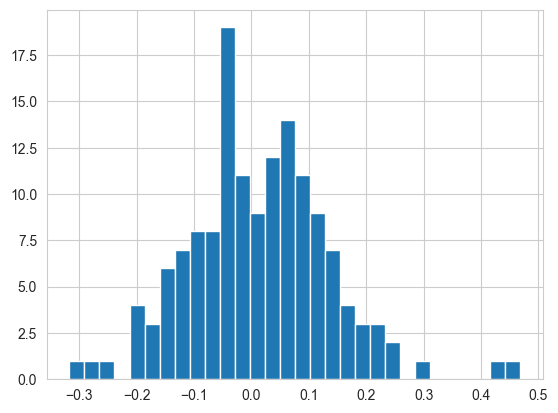

In [20]:
errors = y_test['SalePrice'] - preds
errors.hist(bins=30)
plt.show()

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

### Feature importance

Text(0.5, 1.0, 'Feature Importance')

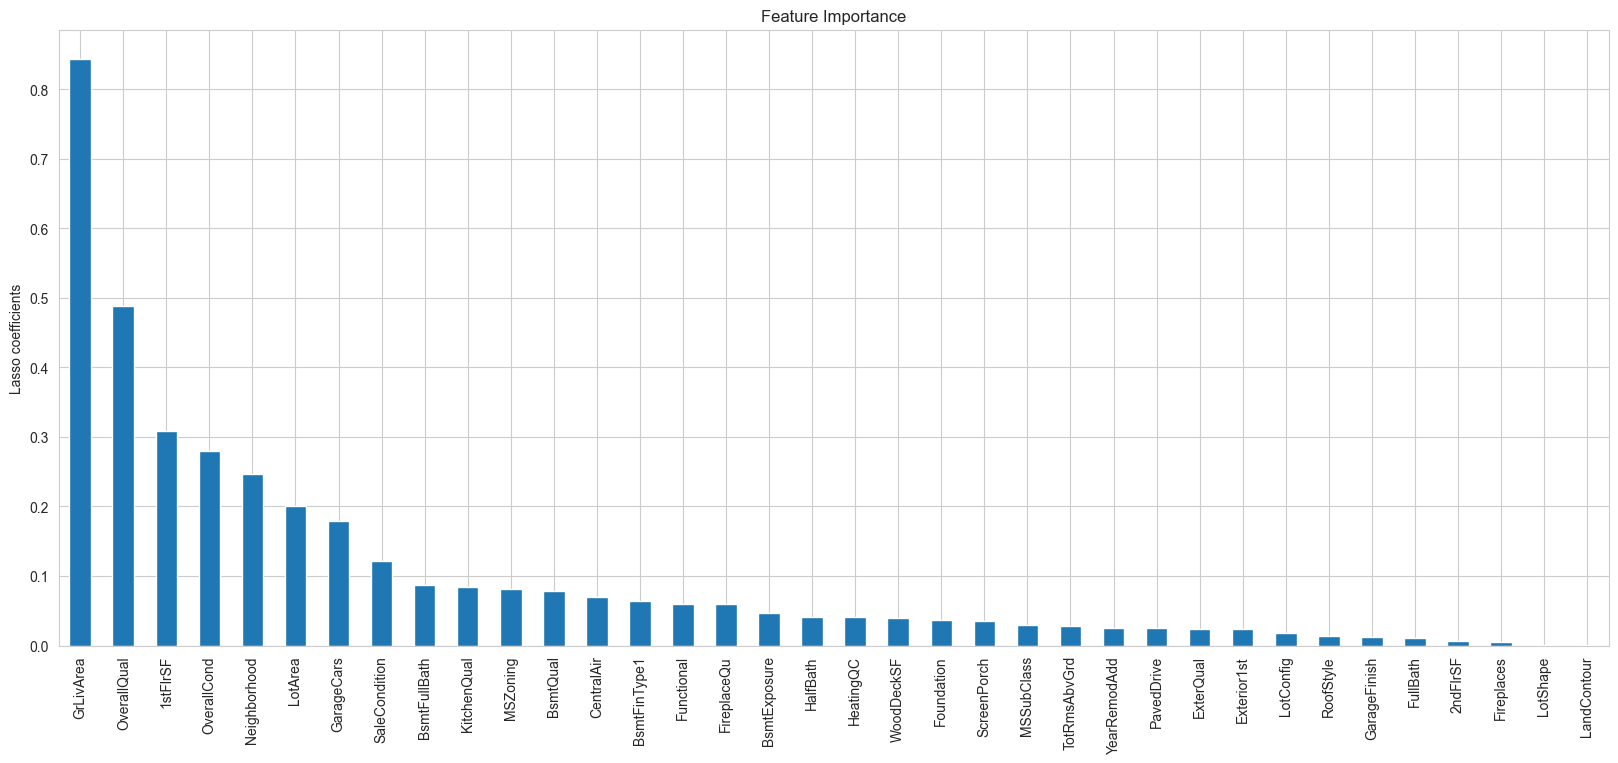

In [22]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(ascending=False, inplace=True)
importance.plot.bar(figsize=(20, 8))
plt.ylabel('Lasso coefficients')
plt.title('Feature Importance')


# save the model

In [28]:
joblib.dump(lin_model, 'lasso_regression.joblib')

['lasso_regression.joblib']

# Additional Resources


## Feature Engineering

- [Feature Engineering for Machine Learning](https://www.udemy.com/course/feature-engineering-for-machine-learning/?referralCode=A855148E05283015CF06) - Online Course
- [Packt Feature Engineering Cookbook](https://www.packtpub.com/data/python-feature-engineering-cookbook) - Book
- [Feature Engineering for Machine Learning: A comprehensive Overview](https://trainindata.medium.com/feature-engineering-for-machine-learning-a-comprehensive-overview-a7ad04c896f8) - Article
- [Practical Code Implementations of Feature Engineering for Machine Learning with Python](https://towardsdatascience.com/practical-code-implementations-of-feature-engineering-for-machine-learning-with-python-f13b953d4bcd) - Article

## Feature Selection

- [Feature Selection for Machine Learning](https://www.udemy.com/course/feature-selection-for-machine-learning/?referralCode=186501DF5D93F48C4F71) - Online Course
- [Feature Selection for Machine Learning: A comprehensive Overview](https://trainindata.medium.com/feature-selection-for-machine-learning-a-comprehensive-overview-bd571db5dd2d) - Article

## Machine Learning

- [Best Resources to Learn Machine Learning](https://trainindata.medium.com/find-out-the-best-resources-to-learn-machine-learning-cd560beec2b7) - Article
- [Machine Learning with Imbalanced Data](https://www.udemy.com/course/machine-learning-with-imbalanced-data/?referralCode=F30537642DA57D19ED83) - Online Course